# Analasis de dependencia de Quimicos

Se desea validar la dependencia de los quimicos para la producción de unos procesos, y el impacto en las etapas del proceso.

El objetivo sera demostrar con analisis estadistico el nivel de dependencia de las variables, los valores que hacen que incremente o disminuya.

### Cargamos los datos

In [24]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_excel('DataSet_ValidaQuimicos_v2.xlsx', 'Q_TratamientoJugo',skiprows=3)

In [14]:
df_original.fillna(0)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ZAFRA                                        112 non-null    int64  
 1   Semana                                       112 non-null    int64  
 2   dia                                          112 non-null    float64
 3   Periodo3                                     112 non-null    float64
 4   B5                                           112 non-null    float64
 5   B4                                           112 non-null    float64
 6   B3                                           112 non-null    float64
 7   B2                                           112 non-null    float64
 8   B1                                           112 non-null    float64
 9   Cal (kg/t Caña)                              112 non-null    float64
 10  Az

In [13]:
varPeridoBin = "Semana"
df_original = df_original.astype({varPeridoBin: int})
df_original = df_original.groupby(by=["ZAFRA",varPeridoBin], dropna=False).mean()
df_original.reset_index(inplace= True)

# Matriz de correlación

Se realiza una matriz de correlación como primer analisis de los datos

In [29]:
df_corr = df_original.drop(["dia","I_ACIDO_SULFAMICO","Periodo3","B5","B4","B3","B2","B1","Cal (kg/t Caña)","Azufre (kg/t Azúcar Blanco)","Ácido Fosfórico (kg/t Caña)","Ácido Sulfámico (kg/t Caña)","Soda Cáustica (l/t Caña)","Floculante de Jugo (kg/t Caña)","Floculante de Cachaza (kg/t Caña)","Floculante de Meladura (kg/t Azúcar Blanco)","Decolorantes (l/t Azúcar Blanco)","Bactericida(l/t Caña)","Azúcar refino (t)","Azúcar moreno (t)","Azúcar blanco (t)","Azúcar equivalente para HTM (t)","Azúcar equivalente para Miel B (t)","Azúcar crudo (t)","Caña Recibida","Azucar Blanco + Refino","Azúcar Total (t)","Azúcar_refino_%","Azúcar_Moreno_%","Azúcar_Blanco_%","Azúcar_Equivalente_HTM_%","Azúcar_Equivalente_Miel_B_%","Azúcar_Crudo_%","Azúcar_Blanco_Refino_%","YD_TurbidezMeladuraClarificada.1","YD_TransmitanciaMeladuraClarificada.1","YD_ColorMeladuraClarificada.1","YD_TurbidezMeladuraClarificada.2","YD_TransmitanciaMeladuraClarificada.2","YD_ColorMeladuraClarificada.2","YD_TurbidezMeladuraClarificada.3","YD_TransmitanciaMeladuraClarificada.3","YD_ColorMeladuraClarificada.3","YD_TurbidezMeladuraClarificada.4","YD_TransmitanciaMeladuraClarificada.4","YD_ColorMeladuraClarificada.4","Y_TurbidezMeladuraClarificada.1","Y_TransmitanciaMeladuraClarificada.1","Y_ColorMeladuraClarificada.1","Y_TurbidezMeladuraClarificada.2","Y_TransmitanciaMeladuraClarificada.2","Y_ColorMeladuraClarificada.2","Y_TurbidezMeladuraClarificada.3","Y_TransmitanciaMeladuraClarificada.3","Y_ColorMeladuraClarificada.3"],axis=1)

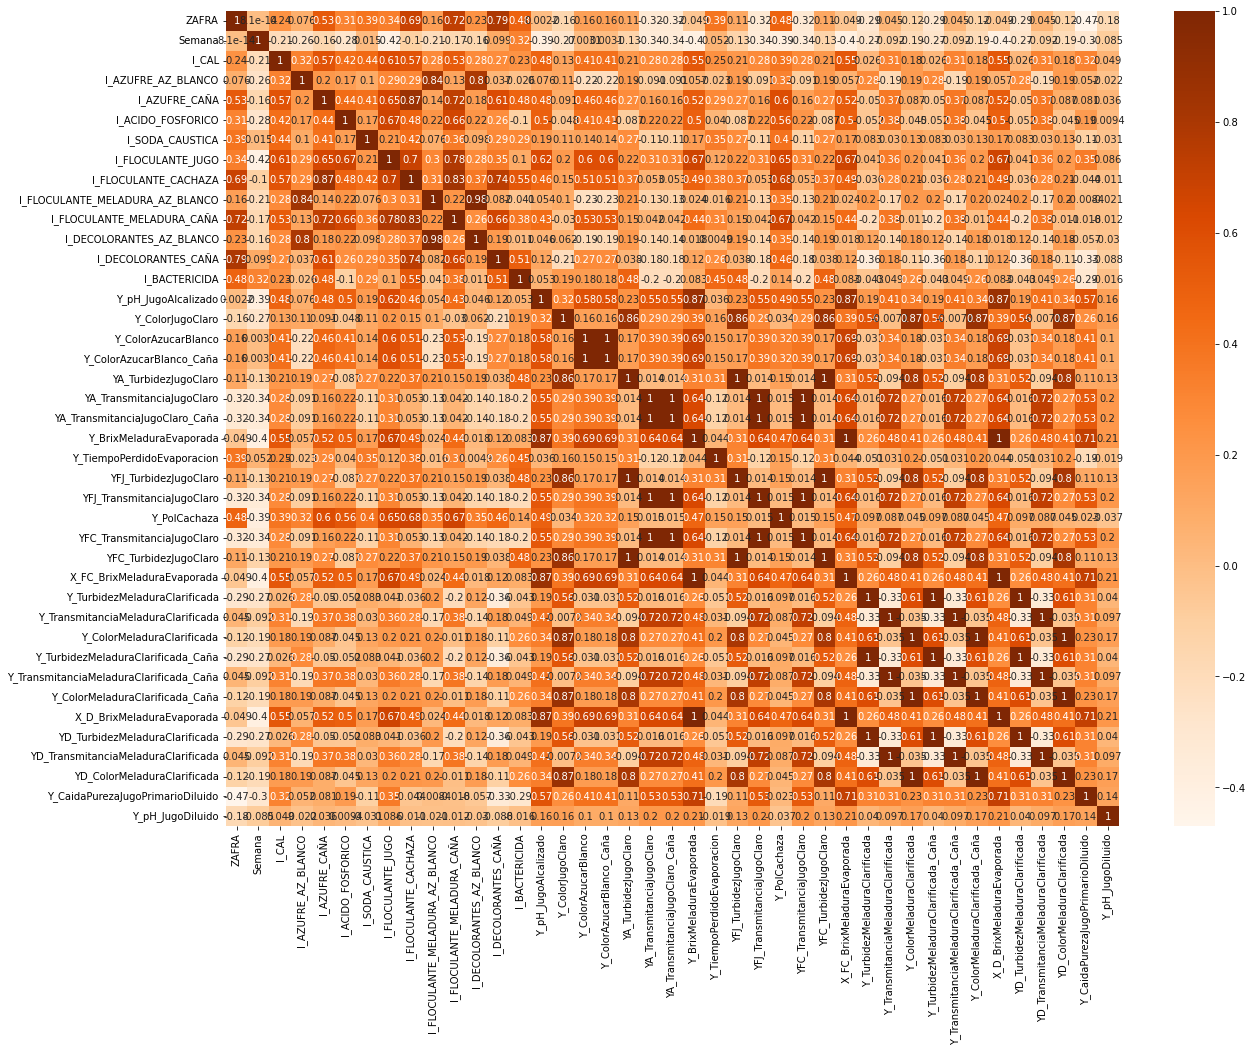

In [72]:
corr_df = df_corr.corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion entre Indicadores (X)

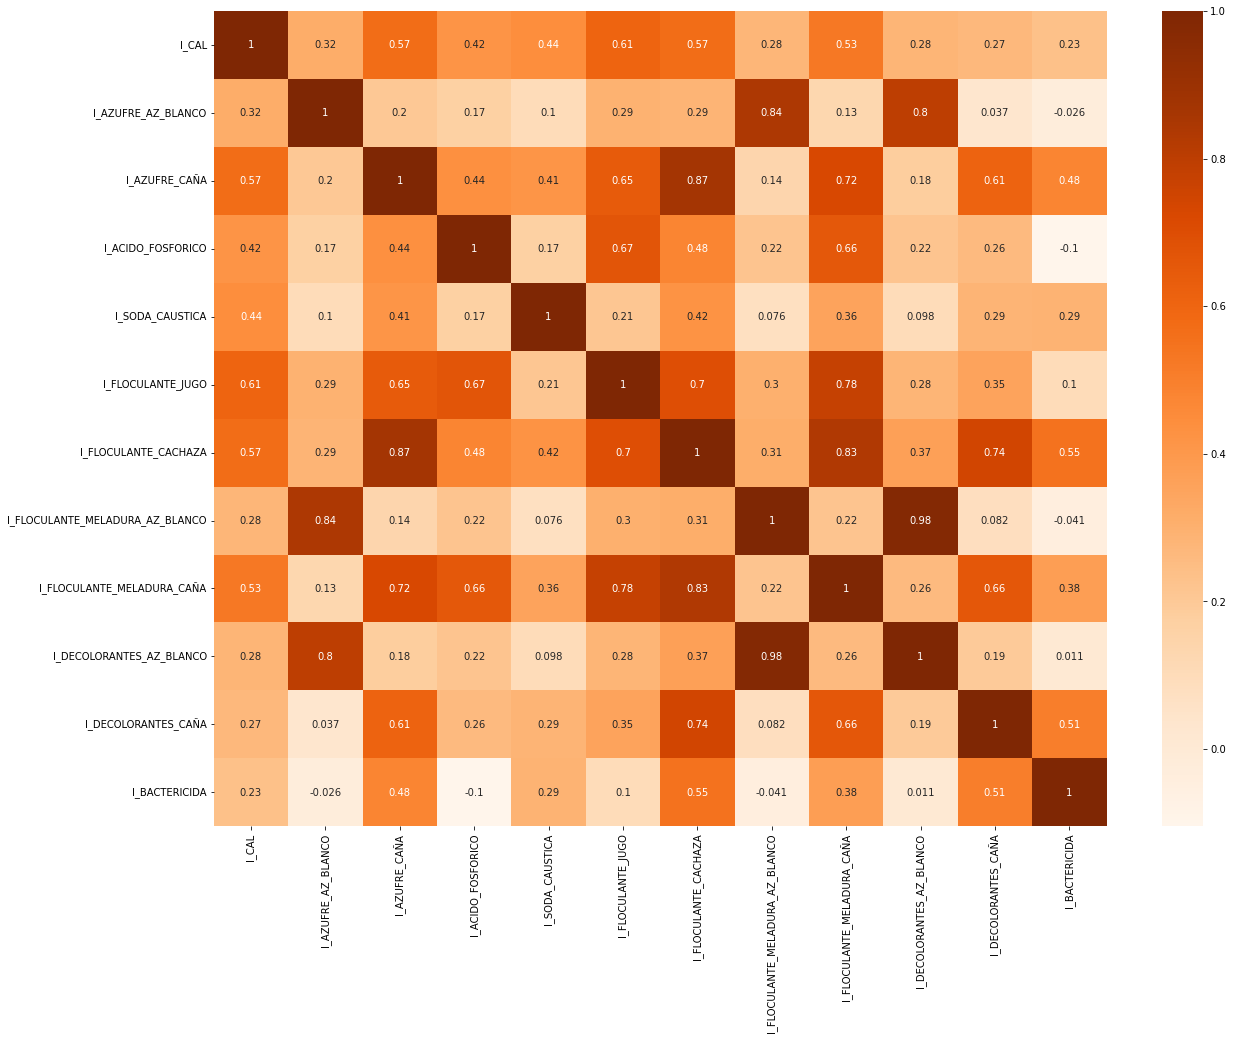

In [71]:
## DEPEDENCIA ENTRE X
columns = ["I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo de CAL

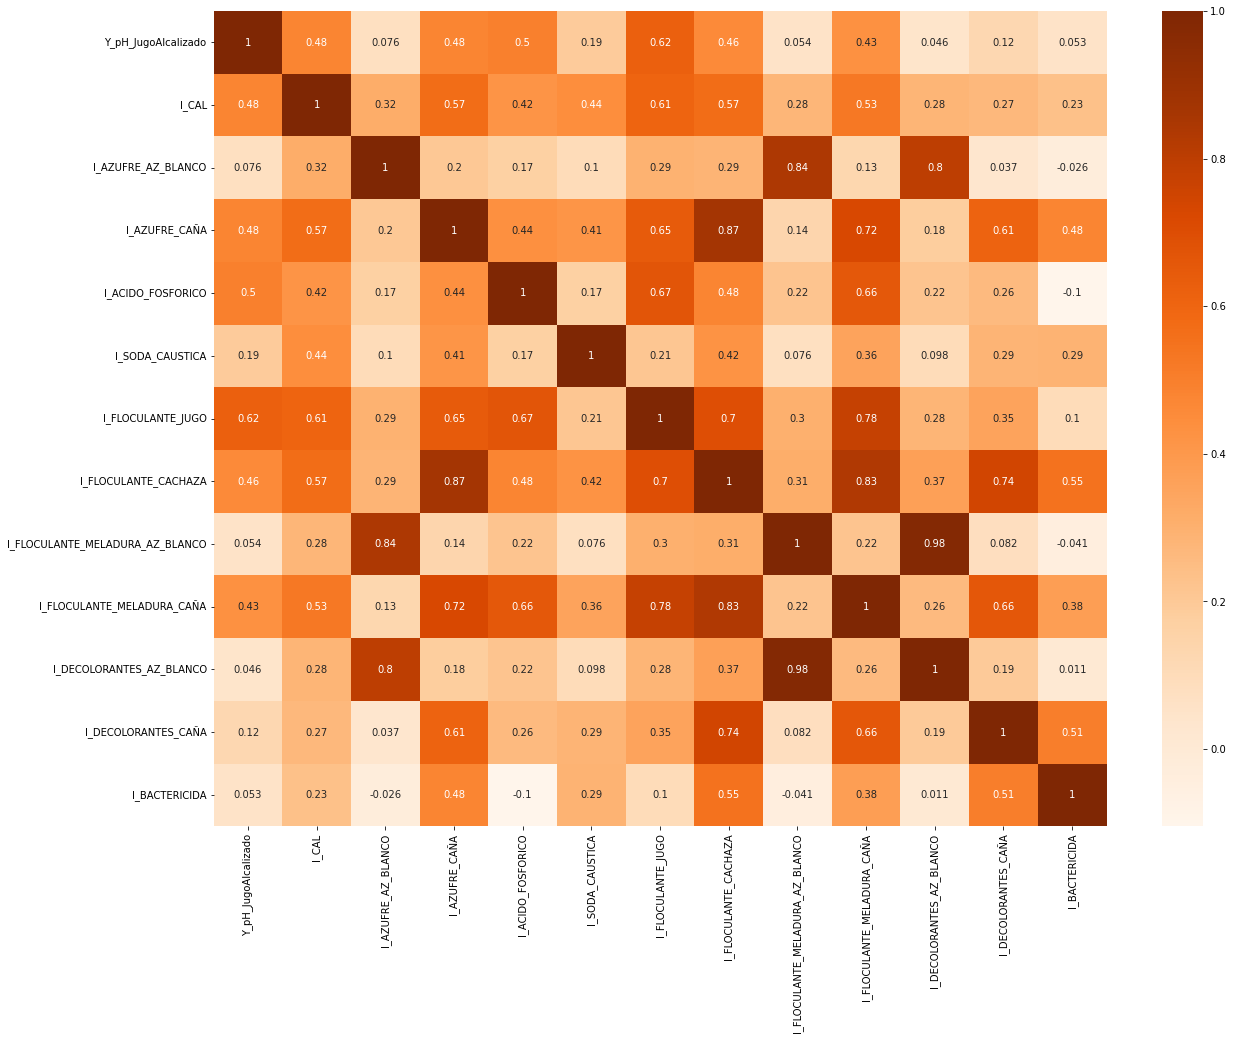

In [63]:
## CONSUMO DE CAL
columns = ["Y_pH_JugoAlcalizado","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo de AZUFRE

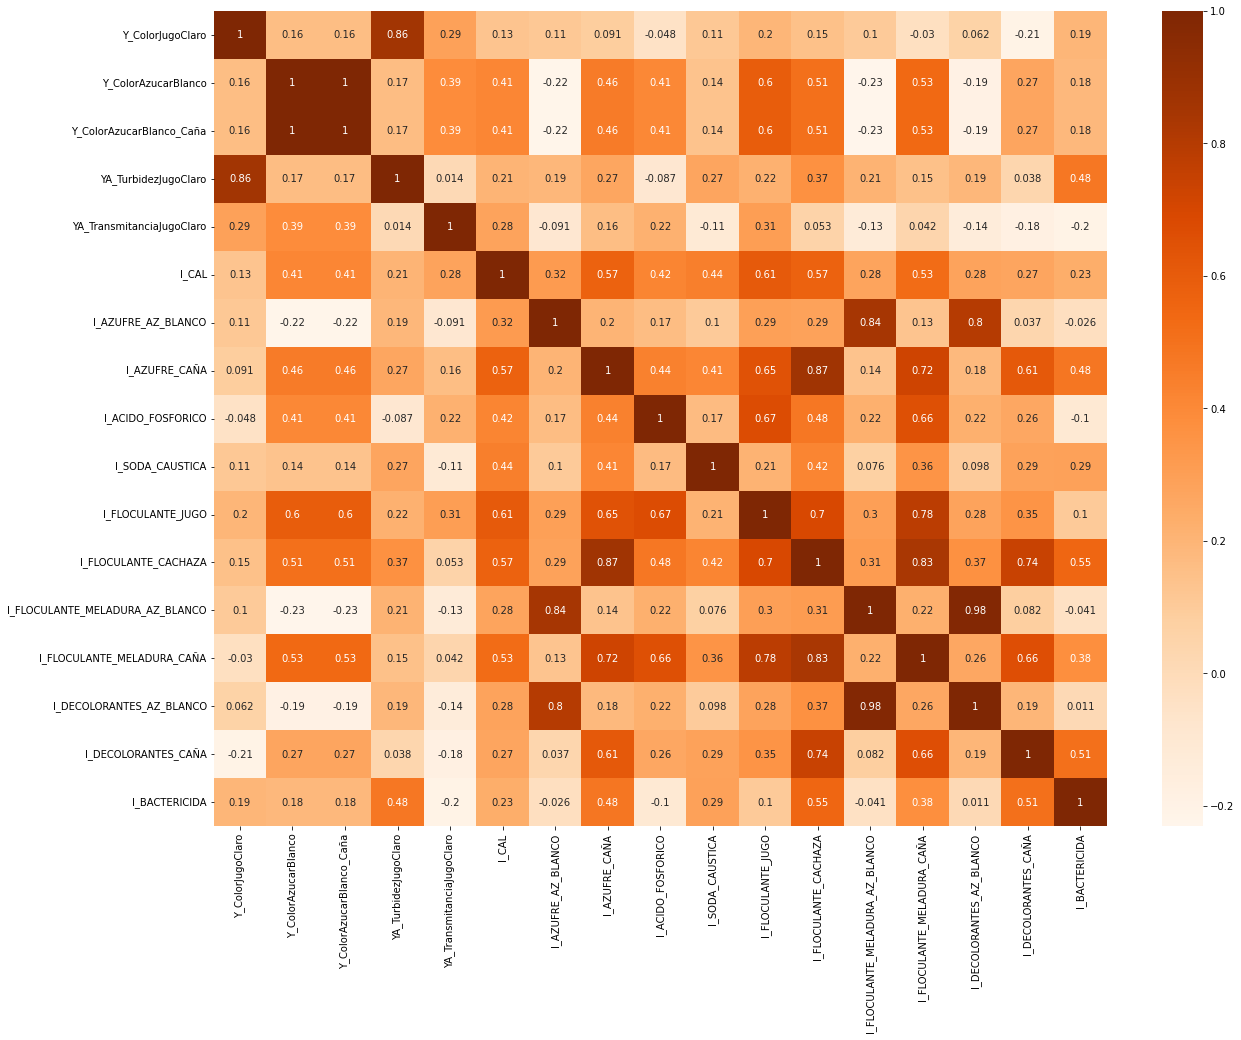

In [64]:
#CONSUMO DE AZUFRE
columns = ["Y_ColorJugoClaro","Y_ColorAzucarBlanco","Y_ColorAzucarBlanco_Caña","YA_TurbidezJugoClaro","YA_TransmitanciaJugoClaro","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo SODA CAUSTICA

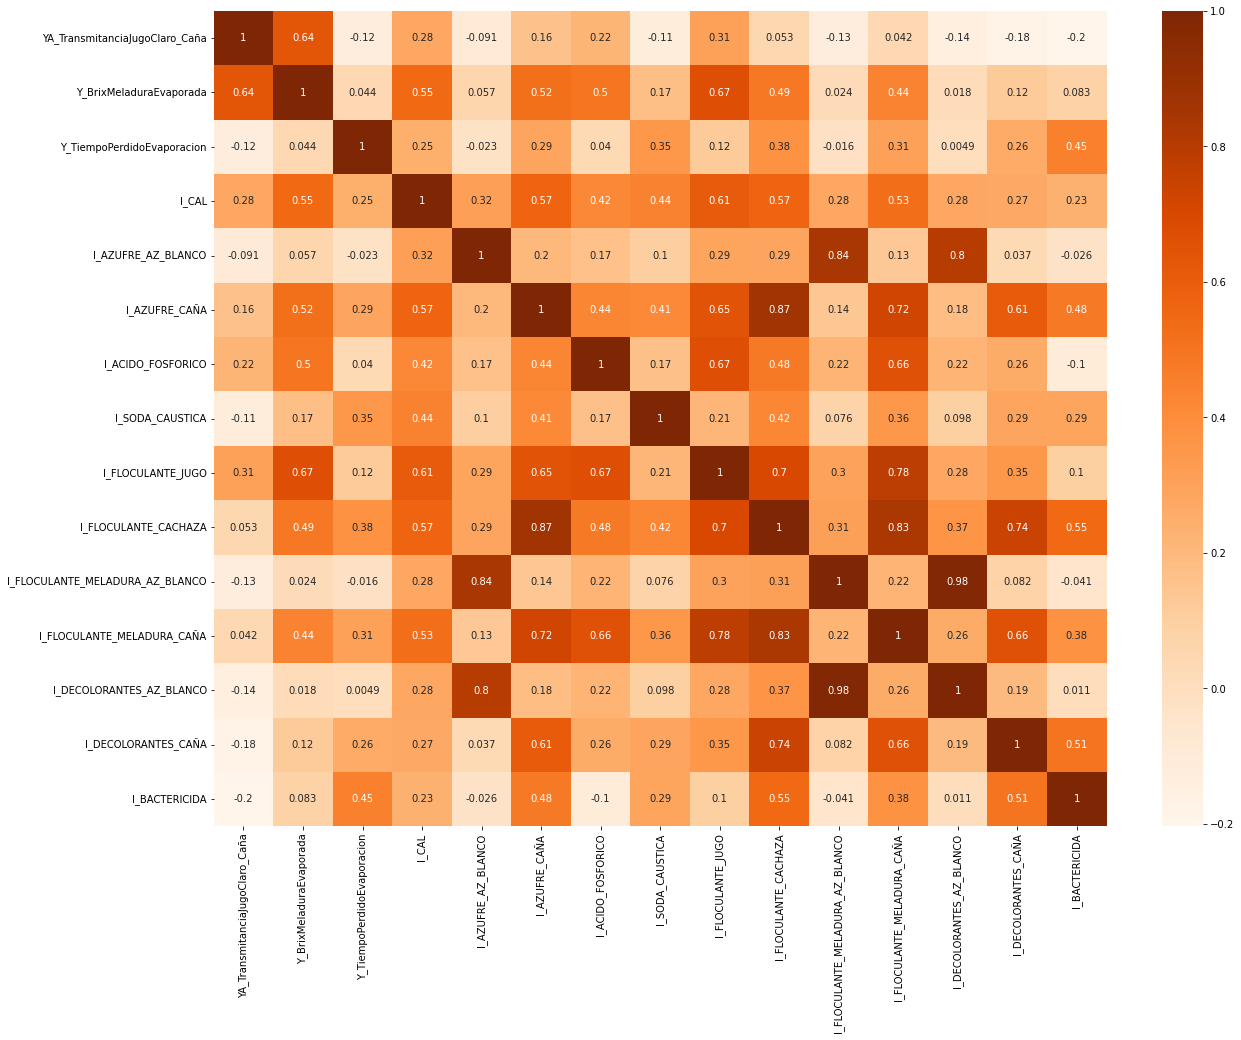

In [65]:
#CONSUMO DE SODA CAUSTICA
columns = ["YA_TransmitanciaJugoClaro_Caña","Y_BrixMeladuraEvaporada","Y_TiempoPerdidoEvaporacion","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo FLOCULANTE DE JUGO

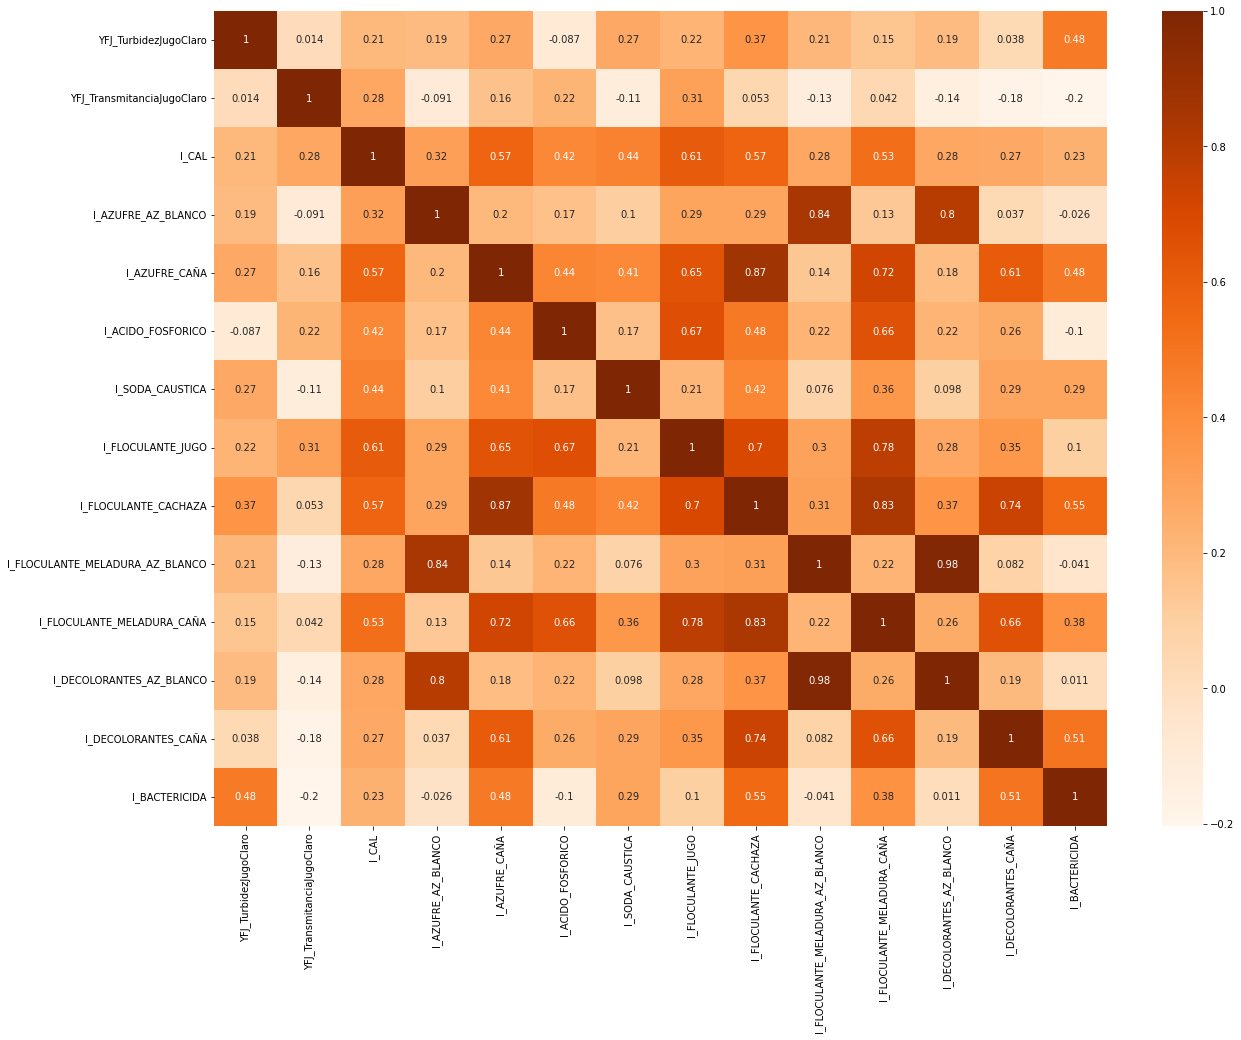

In [66]:
#CONSUMO DE FLOCULANTE DE JUGO
columns = ["YFJ_TurbidezJugoClaro","YFJ_TransmitanciaJugoClaro","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo FLOCULANTE DE CACHAZA

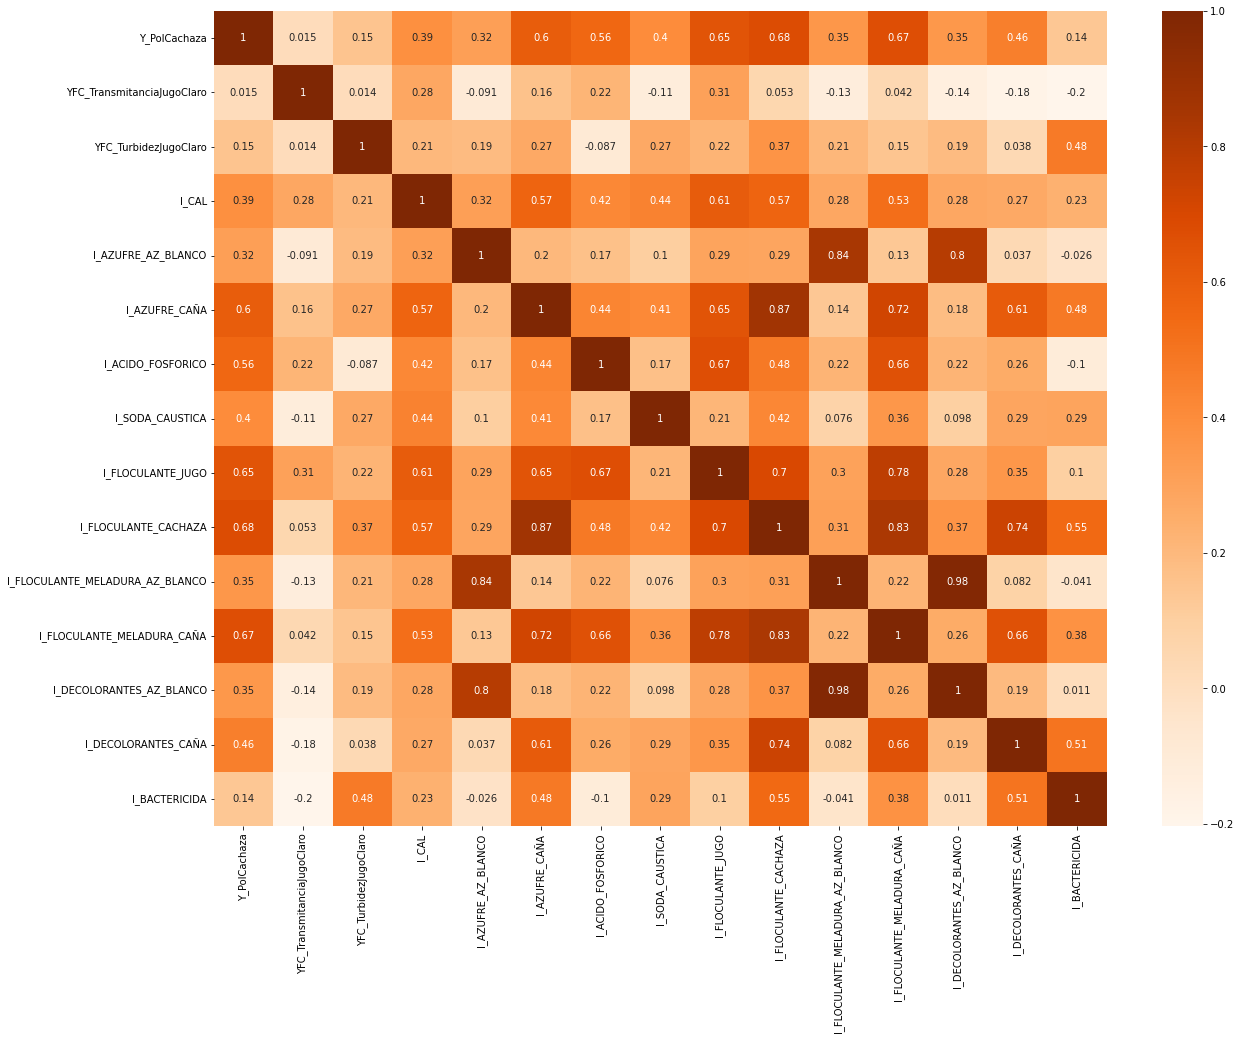

In [67]:
#CONSUMO DE FLOCULANTE DE CACHAZA
columns = ["Y_PolCachaza","YFC_TransmitanciaJugoClaro","YFC_TurbidezJugoClaro","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo FLOCULANTE DE MELADURA

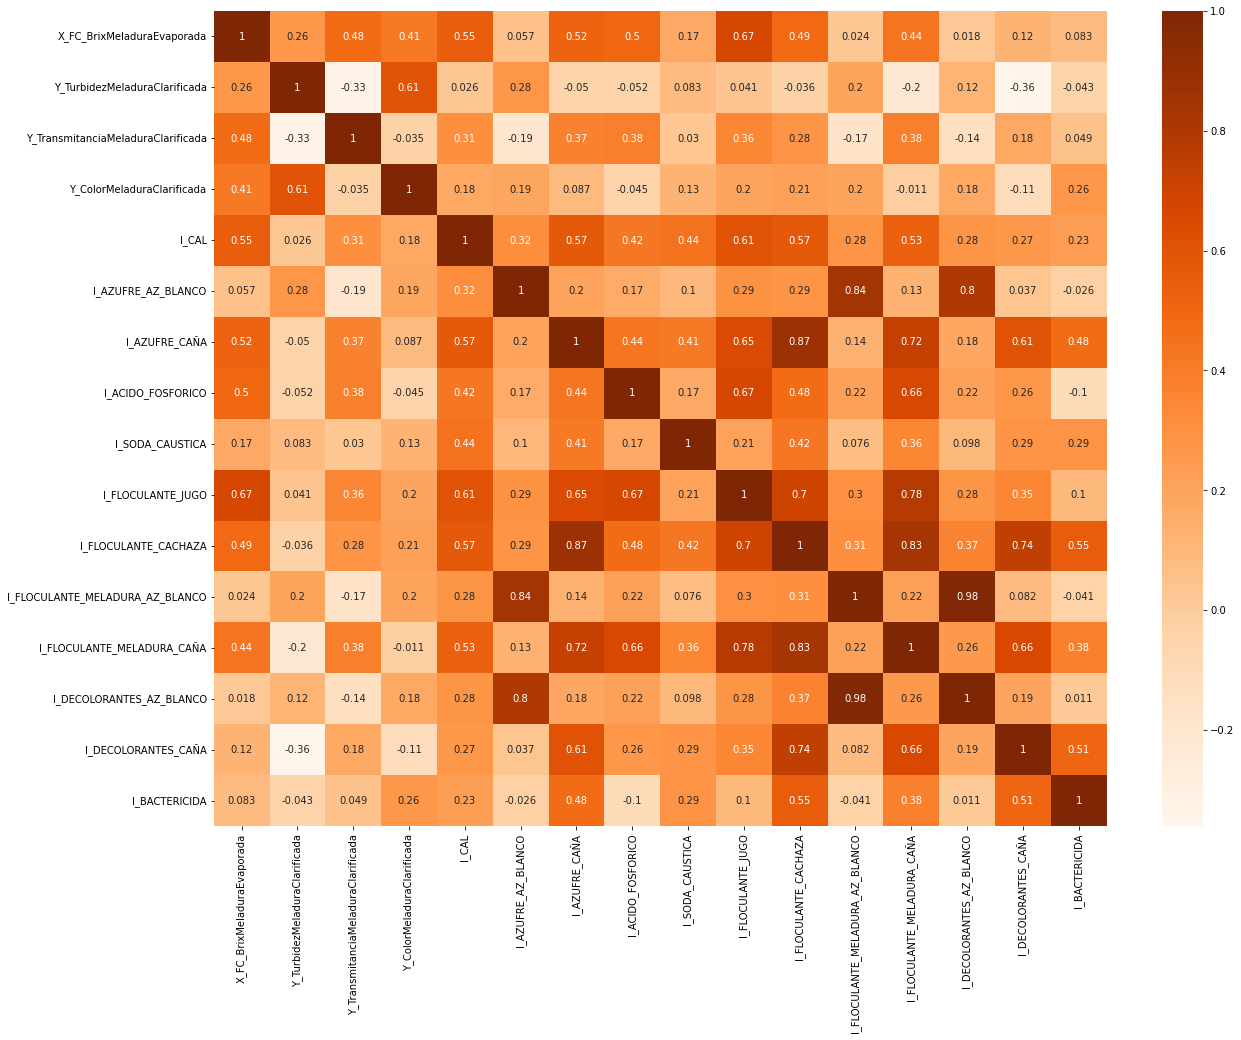

In [70]:
#CONSUMO DE FLOCULANTE DE MELADURA
columns = ["X_FC_BrixMeladuraEvaporada","Y_TurbidezMeladuraClarificada","Y_TransmitanciaMeladuraClarificada","Y_ColorMeladuraClarificada","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo DECOLORANTE

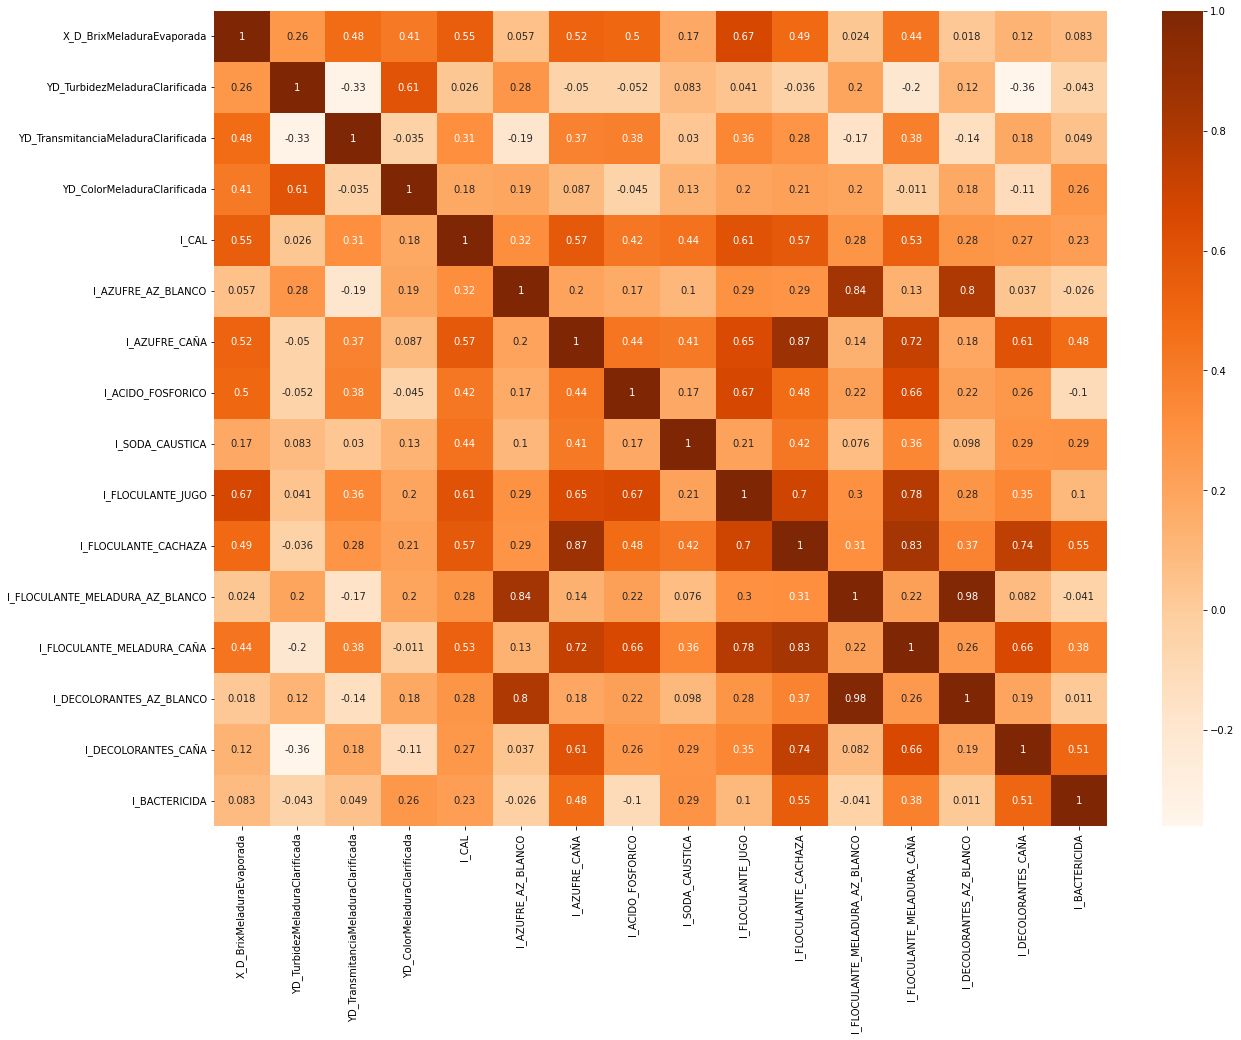

In [69]:
#CONSUMO DE DECOLORANTE
columns = ["X_D_BrixMeladuraEvaporada","YD_TurbidezMeladuraClarificada","YD_TransmitanciaMeladuraClarificada","YD_ColorMeladuraClarificada","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()

### Correlacion Consumo BACTERICIDA

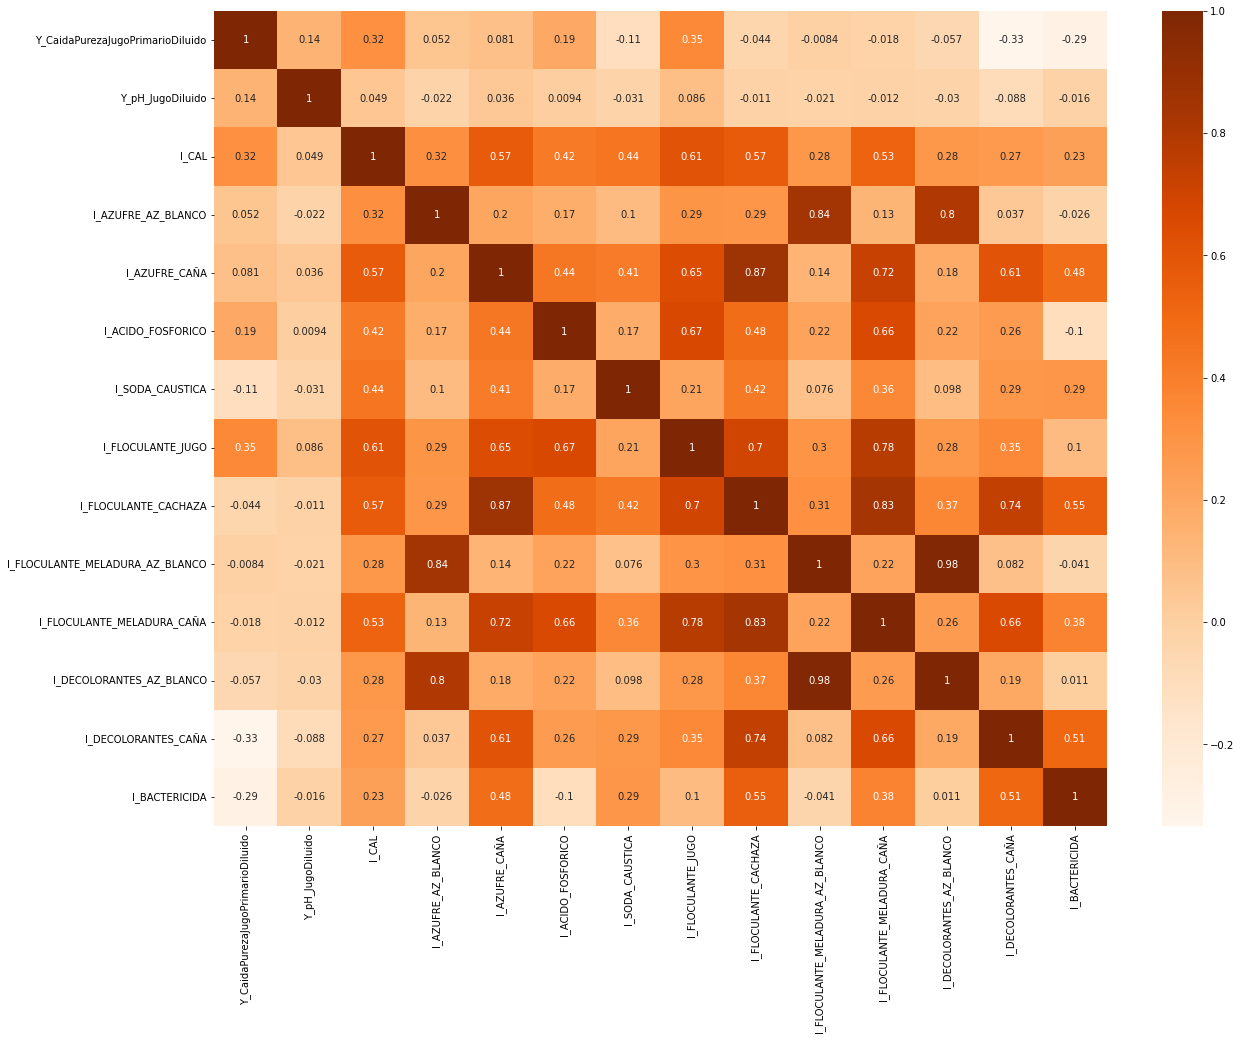

In [68]:
#CONSUMO DE BACTERICIDA
columns = ["Y_CaidaPurezaJugoPrimarioDiluido","Y_pH_JugoDiluido","I_CAL","I_AZUFRE_AZ_BLANCO","I_AZUFRE_CAÑA","I_ACIDO_FOSFORICO","I_SODA_CAUSTICA","I_FLOCULANTE_JUGO","I_FLOCULANTE_CACHAZA","I_FLOCULANTE_MELADURA_AZ_BLANCO","I_FLOCULANTE_MELADURA_CAÑA","I_DECOLORANTES_AZ_BLANCO","I_DECOLORANTES_CAÑA","I_BACTERICIDA"] 
corr_df = df_corr[columns].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True, cmap="Oranges")
plt.show()